In [3]:
import os
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
pd.set_option('display.max_rows', 200)
plotting_context = "paper"
default_palette = "colorblind"
a_palette = sns.color_palette("YlOrRd", 2)
b_palette = sns.color_palette("icefire", 2)
c_palette = sns.color_palette("tab20", 2)
models_palette = sns.color_palette("Spectral",2)
font_scale = 1.4
sns.set(font_scale=font_scale, context=plotting_context)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

def show_barplot_values(ax, decimals=2):
    
    max_y = 0
    for (p_ix, p) in enumerate(ax.patches):
        #if p_ix >= (len(ax.patches) / 2):
        #p_ix = p_ix - (len(ax.patches) / 2)
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + (p.get_height() * 1.05)
        max_y = max(max_y, _y)
        if decimals == 2:
            value = '{:.2f}'.format(_y)
        elif decimals == 1:
            value = '{:.1f}'.format(_y)
        elif decimals == 0:
            value = '{:.0f}'.format(_y)
        ax.text(_x, _y, value, ha="center")
        
    visualized_max_y = max_y * 1.10
    ax.set_ylim([0, visualized_max_y])

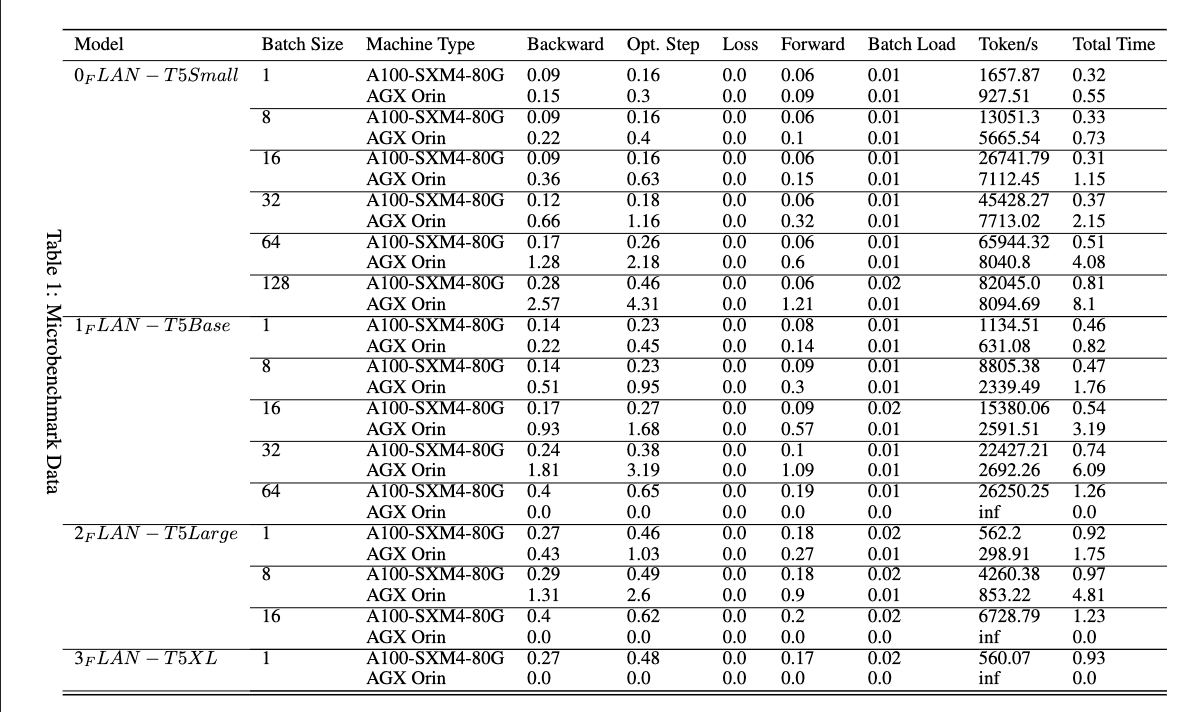

### FLAN T5 Model Throughput

In [22]:
throughput_dict = {
    "model_name": [],
    "minibatch_size": [],
    "tokens_per_s": [],
    "hardware": []

}

def add_to_throughput_dict(model, minibatch_size, tokens_per_s, hardware):
    throughput_dict["model_name"].append(model)
    throughput_dict["minibatch_size"].append(minibatch_size)
    throughput_dict["tokens_per_s"].append(tokens_per_s)
    throughput_dict["hardware"].append(hardware)

add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=1   , tokens_per_s=927, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=8   , tokens_per_s=5665, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=16  , tokens_per_s=7112, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=32  , tokens_per_s=7713, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=64  , tokens_per_s=8040, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=128 , tokens_per_s=8094, hardware="Orin AGX")

add_to_throughput_dict(model="google/flan-t5-base",  minibatch_size=1  ,  tokens_per_s=631, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-base",  minibatch_size=8  ,  tokens_per_s=2339, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-base",  minibatch_size=16 ,  tokens_per_s=2591, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-base",  minibatch_size=32 ,  tokens_per_s=2692, hardware="Orin AGX")

add_to_throughput_dict(model="google/flan-t5-large", minibatch_size=1  ,  tokens_per_s=298, hardware="Orin AGX")
add_to_throughput_dict(model="google/flan-t5-large", minibatch_size=8  ,  tokens_per_s=853, hardware="Orin AGX")


add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=1   , tokens_per_s=1657, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=8   , tokens_per_s=13051, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=16  , tokens_per_s=26741, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=32  , tokens_per_s=45428, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=64  , tokens_per_s=65944, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-small", minibatch_size=128 , tokens_per_s=82045, hardware="A100 SXM4 80G")

add_to_throughput_dict(model="google/flan-t5-base", minibatch_size=1    , tokens_per_s=1134, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-base", minibatch_size=8    , tokens_per_s=8805, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-base", minibatch_size=16   , tokens_per_s=15380, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-base", minibatch_size=32   , tokens_per_s=22427, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-base", minibatch_size=64   , tokens_per_s=26250, hardware="A100 SXM4 80G")

add_to_throughput_dict(model="google/flan-t5-large", minibatch_size=1  ,  tokens_per_s=562, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-large", minibatch_size=8  ,  tokens_per_s=4260, hardware="A100 SXM4 80G")
add_to_throughput_dict(model="google/flan-t5-large", minibatch_size=16 ,  tokens_per_s=6728, hardware="A100 SXM4 80G")

add_to_throughput_dict(model="google/flan-t5-xl", minibatch_size=1 ,  tokens_per_s=560, hardware="A100 SXM4 80G")

throughput_df = pd.DataFrame(throughput_dict)
throughput_df

,model_name,minibatch_size,tokens_per_s,hardware
0,google/flan-t5-small,1,927,Orin AGX
1,google/flan-t5-small,8,5665,Orin AGX
2,google/flan-t5-small,16,7112,Orin AGX
3,google/flan-t5-small,32,7713,Orin AGX
4,google/flan-t5-small,64,8040,Orin AGX
5,google/flan-t5-small,128,8094,Orin AGX
6,google/flan-t5-base,1,631,Orin AGX
7,google/flan-t5-base,8,2339,Orin AGX
8,google/flan-t5-base,16,2591,Orin AGX
9,google/flan-t5-base,32,2692,Orin AGX


In [23]:
#from transformers import AutoConfig, T5ForConditionalGeneration
#config = AutoConfig.from_pretrained("google/flan-t5-small")
#model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xl")
#print(sum(p.numel() for p in model.parameters() if p.requires_grad))

In [24]:
model_size_dict = {
    "model_name": [],
    "params": [],
    "n_layers": [],  # total layer count
    "d_model": [], # embedding size
    "d_ff": [],    # feedforward output size
    "n_attention_heads": [], # attention head count
    "seq_len": []
}

def add_model_size(name, params, layers, d_model, d_ff, d_kv, heads, seq_len):
    model_size_dict["model_name"].append(name)
    model_size_dict["params"].append(params)
    model_size_dict["n_layers"].append(layers)
    model_size_dict["d_model"].append(d_model)
    model_size_dict["d_ff"].append(d_ff)
    model_size_dict["n_attention_heads"].append(heads)
    model_size_dict["seq_len"].append(seq_len)

add_model_size(name="google/flan-t5-small", params=76961152,   layers=8,  d_model=512,  d_ff=1024,  d_kv=64,  heads=8,  seq_len=512)
add_model_size(name="google/flan-t5-base",  params=247577856,  layers=12, d_model=768,  d_ff=2048,  d_kv=64,  heads=12, seq_len=512)
add_model_size(name="google/flan-t5-large", params=783150080,  layers=24, d_model=1024, d_ff=2816,  d_kv=64,  heads=16, seq_len=512)
add_model_size(name="google/flan-t5-xl",    params=2849757184, layers=24, d_model=2048, d_ff=5120,  d_kv=64,  heads=32, seq_len=512)

model_df = pd.DataFrame(model_size_dict)
model_df

,model_name,params,n_layers,d_model,d_ff,n_attention_heads,seq_len
0,google/flan-t5-small,76961152,8,512,1024,8,512
1,google/flan-t5-base,247577856,12,768,2048,12,512
2,google/flan-t5-large,783150080,24,1024,2816,16,512
3,google/flan-t5-xl,2849757184,24,2048,5120,32,512


In [25]:
full_df = throughput_df.merge(model_df, left_on="model_name", right_on="model_name").copy()
full_df

,model_name,minibatch_size,tokens_per_s,hardware,params,n_layers,d_model,d_ff,n_attention_heads,seq_len
0,google/flan-t5-small,1,927,Orin AGX,76961152,8,512,1024,8,512
1,google/flan-t5-small,8,5665,Orin AGX,76961152,8,512,1024,8,512
2,google/flan-t5-small,16,7112,Orin AGX,76961152,8,512,1024,8,512
3,google/flan-t5-small,32,7713,Orin AGX,76961152,8,512,1024,8,512
4,google/flan-t5-small,64,8040,Orin AGX,76961152,8,512,1024,8,512
5,google/flan-t5-small,128,8094,Orin AGX,76961152,8,512,1024,8,512
6,google/flan-t5-small,1,1657,A100 SXM4 80G,76961152,8,512,1024,8,512
7,google/flan-t5-small,8,13051,A100 SXM4 80G,76961152,8,512,1024,8,512
8,google/flan-t5-small,16,26741,A100 SXM4 80G,76961152,8,512,1024,8,512
9,google/flan-t5-small,32,45428,A100 SXM4 80G,76961152,8,512,1024,8,512


In [47]:
#theoretical_hardware_fp16_flops = 170/2 * 1e12 # Orin AGX (INT8 / 2)
#theoretical_hardware_fp16_flops = 77.97  # A100 SXM4 80G (FP16)
#theoretical_hardware_fp16_flops = 311.84 # A100 SXM4 80G (BF16)

def calculate_mfu(row):
    tokens_per_s = row["tokens_per_s"]
    params  = row["params"]
    layers  = row["n_layers"]
    heads   = row["n_attention_heads"]
    emb_dim = row["d_model"]
    
    N = params
    L = layers
    H = heads
    Q = emb_dim / heads
    T = 512
    
    ff_flops = 2 * N
    bw_flops = 4 * N
    attention_flops = 12 * L * H * Q * T
    flops_per_token = ff_flops + bw_flops + attention_flops
    
    if row["hardware"] == "Orin AGX":
        theo_hardware_fp16_flops = (42.5) * 1e12 # Orin AGX (dense tops)
    else:
        theo_hardware_fp16_flops = 311.84 * 1e12 # A100 SXM4 80G (BF16)

    theoretical_model_throughput_tokens_per_second = theo_hardware_fp16_flops / flops_per_token
    
    mfu_in_percent = tokens_per_s / theoretical_model_throughput_tokens_per_second * 100
    print(f"model: {row['model_name']}, mb: {row['minibatch_size']}")
    print(f"      fpt: {flops_per_token}")
    print(f" theo_fpt: {theoretical_model_throughput_tokens_per_second}")
    print(f"    tok/s: {tokens_per_s}")
    print(f"      mfu: {round(mfu_in_percent,2)}%")
    return mfu_in_percent

In [48]:
full_df["mfu"] = full_df.apply(calculate_mfu, axis=1)

model: google/flan-t5-small, mb: 1
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 927
      mfu: 1.06%
model: google/flan-t5-small, mb: 8
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 5665
      mfu: 6.49%
model: google/flan-t5-small, mb: 16
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 7112
      mfu: 8.15%
model: google/flan-t5-small, mb: 32
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 7713
      mfu: 8.84%
model: google/flan-t5-small, mb: 64
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 8040
      mfu: 9.21%
model: google/flan-t5-small, mb: 128
      fpt: 486932736.0
 theo_fpt: 87281.04901946867
    tok/s: 8094
      mfu: 9.27%
model: google/flan-t5-small, mb: 1
      fpt: 486932736.0
 theo_fpt: 640416.9959113203
    tok/s: 1657
      mfu: 0.26%
model: google/flan-t5-small, mb: 8
      fpt: 486932736.0
 theo_fpt: 640416.9959113203
    tok/s: 13051
      mfu: 2.04%
model: google/flan-t5-small, mb: 16

In [51]:
full_df.to_csv("~/mfu.csv")

full_df



,model_name,minibatch_size,tokens_per_s,hardware,params,n_layers,d_model,d_ff,n_attention_heads,seq_len,mfu
0,google/flan-t5-small,1,927,Orin AGX,76961152,8,512,1024,8,512,1.062086
1,google/flan-t5-small,8,5665,Orin AGX,76961152,8,512,1024,8,512,6.490527
2,google/flan-t5-small,16,7112,Orin AGX,76961152,8,512,1024,8,512,8.148390
3,google/flan-t5-small,32,7713,Orin AGX,76961152,8,512,1024,8,512,8.836970
4,google/flan-t5-small,64,8040,Orin AGX,76961152,8,512,1024,8,512,9.211622
5,google/flan-t5-small,128,8094,Orin AGX,76961152,8,512,1024,8,512,9.273491
6,google/flan-t5-small,1,1657,A100 SXM4 80G,76961152,8,512,1024,8,512,0.258738
7,google/flan-t5-small,8,13051,A100 SXM4 80G,76961152,8,512,1024,8,512,2.037891
8,google/flan-t5-small,16,26741,A100 SXM4 80G,76961152,8,512,1024,8,512,4.175561
9,google/flan-t5-small,32,45428,A100 SXM4 80G,76961152,8,512,1024,8,512,7.093503


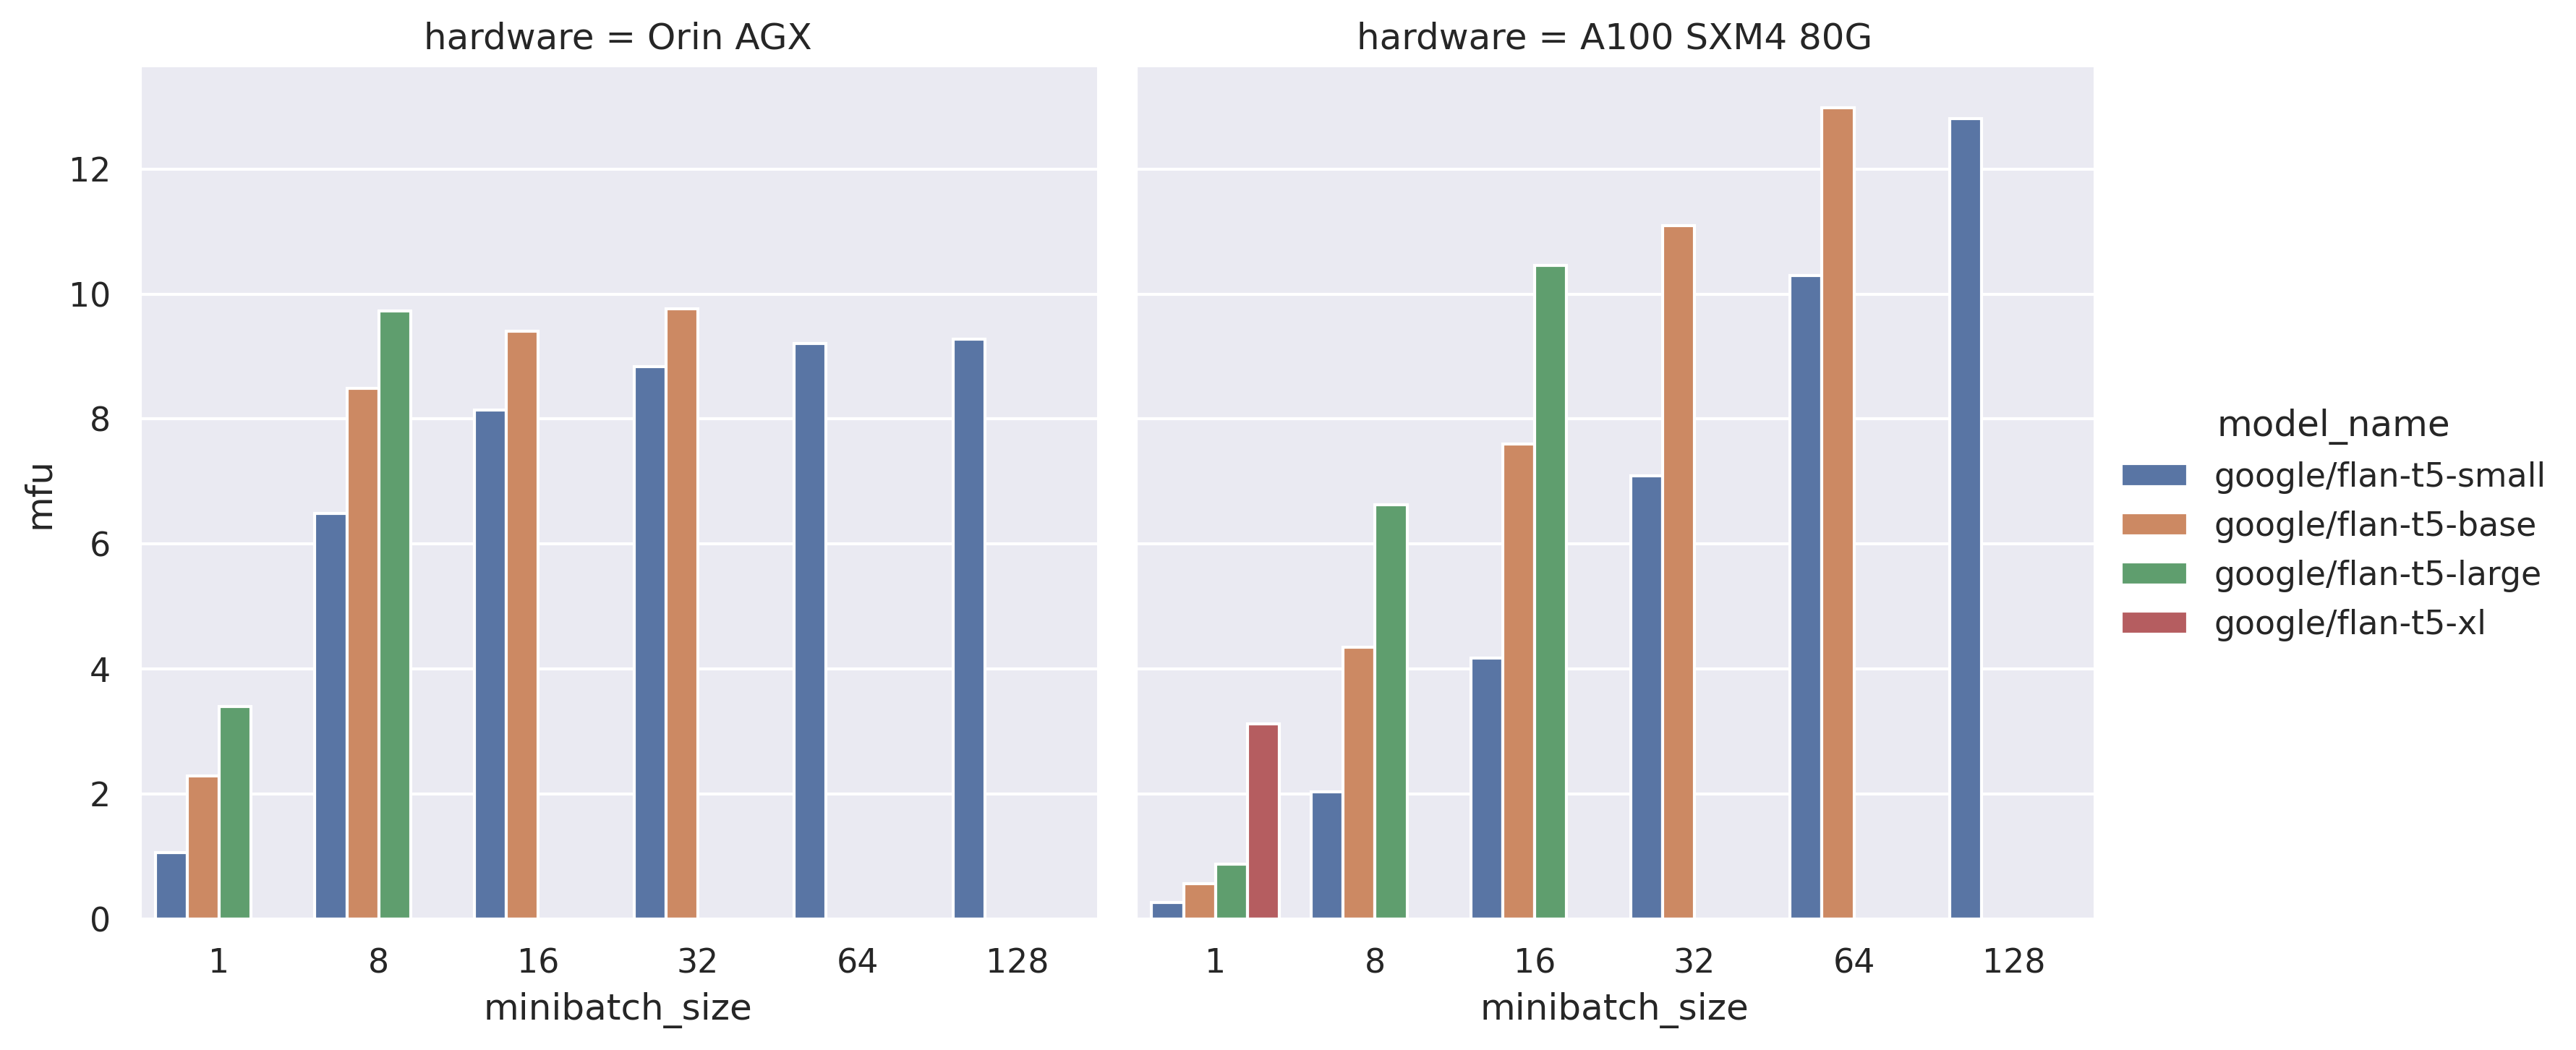

In [50]:
#fig, ax = plt.subplots(1,1)

temp_df = full_df

fig = sns.catplot(
    data=temp_df,
    x="minibatch_size",
    y="mfu",
    hue="model_name",
    col="hardware",
    kind="bar")
#    ax=ax)
#show_barplot_values(ax)
#fig.set_ylabel("Model Flops Utilization in %")
#fig.set_xlabel("Minibatch Size")
#ax.legend(title="Model Name", loc="upper right")
#fig.set_title("Model Flop Utilization for Orin AGX")

In [46]:
print(f"A100 ratio:     {(312 * 1000) / 2039}")
print(f"Orin AGX ratio: {(42.5 * 1000) / 205}")

A100 ratio:     153.01618440411966
Orin AGX ratio: 207.3170731707317
